<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Python_para_ML_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/ricardorocha86/Python-para-Machine-Learning/master/Imagens/capa%20-%20python%20para%20ml%2012.jpg)

# **Python para Machine Learning** - Parte 12

Nesse notebook vamos ver:
- Métricas para Classificação Binária
- Exemplo Final: Modelagem de Churn
- Exercícios
- Links Úteis



---



## **Métricas para Classificação Binária**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url1 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv' 
titanic = pd.read_csv(url1) 

In [ ]:
teste1 = titanic['Sex'].map({'male': 0, 'female': 1})

In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
mc = confusion_matrix(titanic['Survived'], teste1)

In [ ]:
mc

array([[468,  81],
       [109, 233]])

In [ ]:
vn, fp, fn, vp = mc.flatten()

print('VP: {}'.format(vp))
print('VN: {}'.format(vn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\nTOTAL: {}'.format(fn+fp+vn+vp))

VP: 233
VN: 468
FP: 81
FN: 109

TOTAL: 891


In [ ]:
def MetricasClassBinaria(observado, predito, custo = None):
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    print('  Prevalência de Positivos: {:.4f}'.format(pre))
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    print('                Eficiência: {:.4f}'.format(efi))
 

    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
            'f1-score': f1s, 'eficiência': efi}

    if custo is not None:
        cost = (mc * np.array(custo).reshape(2,2)).sum()
        print('\n                     Custo: {}'.format(cost))
        metricas['custo'] = cost

    return metricas

In [ ]:
metricas = MetricasClassBinaria(titanic['Survived'], teste1, [1, -1, 20, 2])

  Prevalência de Positivos: 0.3838
                  Acurácia: 0.7868
             Sensibilidade: 0.6813
            Especificidade: 0.8525
  Valor Preditivo Positivo: 0.7420
  Valor Preditivo Negativo: 0.8111
Coef. de Corr. de Matthews: 0.5434
                  F1-Score: 0.7104
                Eficiência: 0.7669

                     Custo: 3033


In [ ]:
metricas



---



## **Exemplo Final: Modelagem de Churn**

In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Churn/churn.csv'
churn = pd.read_csv(url)
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Análise Exploratória de Dados Básica

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz 

In [ ]:
eda = sweetviz.compare_intra(churn, churn['Exited'] == 0, ['Cliente', 'Ex-Cliente'])
eda.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Pré-processamento dos Dados

#### 1. Novas Variáveis

In [ ]:
def aux1(x):
    if x == 0:
        return 'zero'
    elif x < 100000:
        return '0-100k'
    else:
        return '100k+'

churn['Saldo'] = churn['Balance'].apply(aux1)

In [ ]:
def aux2(x):
    if x < 3:
        return '0-2'
    elif x < 8:
        return '3-7'
    else:
        return '8+'

churn['Tempo'] = churn['Tenure'].apply(aux2)

In [ ]:
def aux3(x):
    if x == 1:
        return '1'
    elif x == 2:
        return '2'
    else:
        return '3+'

churn['Produtos'] = churn['NumOfProducts'].apply(aux3)

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Saldo,Tempo,Produtos
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,zero,0-2,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0-100k,0-2,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,100k+,8+,3+
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,zero,0-2,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,100k+,0-2,1


#### 2. Dropando Variáveis

In [ ]:
churn.drop(['RowNumber', 'CustomerId', 'Surname', 'Balance', 'Tenure', 'NumOfProducts'], axis = 1, inplace = True)

In [ ]:
churn.head()

,CreditScore,Geography,Gender,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Saldo,Tempo,Produtos
0,619,France,Female,42,1,1,101348.88,1,zero,0-2,1
1,608,Spain,Female,41,0,1,112542.58,0,0-100k,0-2,1
2,502,France,Female,42,1,0,113931.57,1,100k+,8+,3+
3,699,France,Female,39,0,0,93826.63,0,zero,0-2,2
4,850,Spain,Female,43,1,1,79084.10,0,100k+,0-2,1


#### 3. Dummificações

In [ ]:
churn = pd.get_dummies(churn, columns = ['Geography', 'Gender', 'Saldo', 'Tempo', 'Produtos'], drop_first = True)

In [ ]:
churn.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Saldo_100k+,Saldo_zero,Tempo_3-7,Tempo_8+,Produtos_2,Produtos_3+
0,619,42,1,1,101348.88,1,0,0,0,0,1,0,0,0,0
1,608,41,0,1,112542.58,0,0,1,0,0,0,0,0,0,0
2,502,42,1,0,113931.57,1,0,0,0,1,0,0,1,0,1
3,699,39,0,0,93826.63,0,0,0,0,0,1,0,0,1,0
4,850,43,1,1,79084.10,0,0,1,0,1,0,0,0,0,0


#### 4. Padronizações

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
aux0 = sc.fit_transform(churn[['CreditScore', 'Age', 'EstimatedSalary']])
aux1 = pd.DataFrame(aux0, columns = ['Escore', 'Idade', 'Salario'])
churn = pd.concat([churn, aux1], axis = 1)
churn.drop(['CreditScore', 'Age', 'EstimatedSalary'], axis = 1, inplace = True) 

In [ ]:
churn.head()

,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male,Saldo_100k+,Saldo_zero,Tempo_3-7,Tempo_8+,Produtos_2,Produtos_3+,Escore,Idade,Salario
0,1,1,1,0,0,0,0,1,0,0,0,0,-0.326221,0.293517,0.021886
1,0,1,0,0,1,0,0,0,0,0,0,0,-0.440036,0.198164,0.216534
2,1,0,1,0,0,0,1,0,0,1,0,1,-1.536794,0.293517,0.240687
3,0,0,0,0,0,0,0,1,0,0,1,0,0.501521,0.007457,-0.108918
4,1,1,0,0,1,0,1,0,0,0,0,0,2.063884,0.388871,-0.365276


## **Modelagem**

Nesse caso, temos **dois objetivos**:

- Selecionar um bom modelo que se ajuste a esses dados
- Estimar o erro de generalização do modelo

Para isso, vamos dividir os dados em **treinamento (90%)** e **validação (10%)**. Como temos 10000 observações no conjunto de dados, a divisão pode ser mais desbalanceada, de forma que dessa maneira ainda sobra 1000 elementos no conjunto de validação.

Vamos utilizar **validação cruzada no conjunto de dados de treinamento** para encontrar os melhores parâmetros para os modelos propostos e, por fim, verificaremos o **erro de generalização dos modelos na amostra final de validação**.

In [ ]:
#Fazendo a Divisão em Teste e Treinamento
from sklearn.model_selection import train_test_split

Xtreino, Xvalid, Ytreino, Yvalid = train_test_split(churn.drop('Exited', axis = 1), 
                                                    churn['Exited'], 
                                                    test_size = 1000)

In [ ]:
# Configuração da Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 20)

In [ ]:
# Importando os Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Definindo a métrica de interesse 
metrica = 'f1'

### Regressão Logística 

In [ ]:
# Verificando a Performance da Regressão Logística

sens_reglog = cross_val_score(LogisticRegression(), Xtreino, Ytreino, cv = kf, scoring = metrica)
 
print('F1-Score: {:.2f}%'.format(100*sens_reglog.mean()))

F1-Score: 49.45%


In [ ]:
reglog.fit(Xtreino, Ytreino)
pred_reglog = reglog.predict(Xvalid)

met_reglog = MetricasClassBinaria(Yvalid, pred_reglog)

  Prevalência de Positivos: 0.2010
                  Acurácia: 0.8370
             Sensibilidade: 0.3731
            Especificidade: 0.9537
  Valor Preditivo Positivo: 0.6696
  Valor Preditivo Negativo: 0.8581
Coef. de Corr. de Matthews: 0.4153
                  F1-Score: 0.4792
                Eficiência: 0.6634


### K Vizinhos Mais Próximos

In [ ]:
# Encontrando o melhor valor de K através de Validação Cruzada K-FOLD 

from sklearn.model_selection import GridSearchCV

valores = np.arange(1, 51, 2)
parametros = {'n_neighbors': valores}

clf = GridSearchCV(KNeighborsClassifier(), param_grid = parametros, cv = kf, scoring = metrica)
clf.fit(Xtreino, Ytreino)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
# melhor escolha de K
print(clf.cv_results_['mean_test_score'])
print(clf.best_params_)

[0.47383495 0.48164783 0.4992857  0.48532457 0.49308602 0.48417992
 0.4663896  0.46587732 0.46049176 0.46399325 0.46248402 0.45161951
 0.44983225 0.44730907 0.44811583 0.44952059 0.4459441  0.44226384
 0.4421292  0.43908712 0.43649845 0.43593595 0.43013927 0.42377427
 0.42617382]
{'n_neighbors': 5}


In [ ]:
# verificando a performance do KNN para um dado valor de K

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(Xtreino, Ytreino)
pred_knn5 = knn5.predict(Xvalid)

met_knn5 = MetricasClassBinaria(Yvalid, pred_knn5)

  Prevalência de Positivos: 0.2010
                  Acurácia: 0.8380
             Sensibilidade: 0.3831
            Especificidade: 0.9524
  Valor Preditivo Positivo: 0.6696
  Valor Preditivo Negativo: 0.8599
Coef. de Corr. de Matthews: 0.4215
                  F1-Score: 0.4873
                Eficiência: 0.6678


### Árvore de Decisão

In [ ]:
# Encontrando o melhor valor do 'max_depth' através de Validação Cruzada K-FOLD

from sklearn.model_selection import GridSearchCV

valores = np.arange(2, 15, 1)
parametros = {'max_depth': valores}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid = parametros, cv = kf, scoring = metrica)
clf.fit(Xtreino, Ytreino)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             p

In [ ]:
# melhor escolha de profundidade
print(clf.cv_results_['mean_test_score'])
print(clf.best_params_)

[0.53124138 0.49368762 0.51994294 0.54468641 0.53986816 0.55455309
 0.55842828 0.5555886  0.54140483 0.54075041 0.53904522 0.52662225
 0.51967165]
{'max_depth': 8}


In [ ]:
# verificando a performance do KNN para um dado valor de K

arvore = DecisionTreeClassifier(max_depth = 8)
arvore.fit(Xtreino, Ytreino)
pred_arvore = arvore.predict(Xvalid)

met_arvore = MetricasClassBinaria(Yvalid, pred_arvore)

  Prevalência de Positivos: 0.2010
                  Acurácia: 0.8520
             Sensibilidade: 0.4627
            Especificidade: 0.9499
  Valor Preditivo Positivo: 0.6992
  Valor Preditivo Negativo: 0.8754
Coef. de Corr. de Matthews: 0.4870
                  F1-Score: 0.5569
                Eficiência: 0.7063


### Random Forests

In [ ]:
# Encontrando o melhor valor do 'max_depth' através de Validação Cruzada K-FOLD

from sklearn.model_selection import GridSearchCV

valores = np.arange(12, 23, 1)
parametros = {'max_depth': valores}

clf = GridSearchCV(RandomForestClassifier(), param_grid = parametros, cv = kf, scoring = metrica)
clf.fit(Xtreino, Ytreino)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_

In [ ]:
# melhor escolha de profundidade
print(clf.cv_results_['mean_test_score'])
print(clf.best_params_)

[0.09971342 0.36534886 0.49602502 0.5489173  0.56415922 0.5817941
 0.5811164  0.58550045 0.57766715 0.58064815]
{'max_depth': 16}


In [ ]:
# verificando a performance do KNN para um dado valor de K

rf = RandomForestClassifier(max_depth = 16)
rf.fit(Xtreino, Ytreino)
pred_rf = rf.predict(Xvalid)

met_rf = MetricasClassBinaria(Yvalid, pred_rf)

  Prevalência de Positivos: 0.2010
                  Acurácia: 0.8630
             Sensibilidade: 0.4527
            Especificidade: 0.9662
  Valor Preditivo Positivo: 0.7712
  Valor Preditivo Negativo: 0.8753
Coef. de Corr. de Matthews: 0.5204
                  F1-Score: 0.5705
                Eficiência: 0.7095


### Síntese dos Resultados

In [ ]:
# Regressão Logística
reglog = LogisticRegression()
reglog.fit(Xtreino, Ytreino)
pred_reglog = reglog.predict(Xvalid)
met_reglog = MetricasClassBinaria(Yvalid, pred_reglog, custo = [0, 1, 10, 1])

#KNNs
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(Xtreino, Ytreino)
pred_knn3 = knn3.predict(Xvalid)
met_knn3 = MetricasClassBinaria(Yvalid, pred_knn3, custo = [0, 1, 10, 1])

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(Xtreino, Ytreino)
pred_knn5 = knn5.predict(Xvalid)
met_knn5 = MetricasClassBinaria(Yvalid, pred_knn5, custo = [0, 1, 10, 1])

knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(Xtreino, Ytreino)
pred_knn7 = knn7.predict(Xvalid)
met_knn7 = MetricasClassBinaria(Yvalid, pred_knn7, custo = [0, 1, 10, 1])

knn9 = KNeighborsClassifier(n_neighbors = 9)
knn9.fit(Xtreino, Ytreino)
pred_knn9 = knn9.predict(Xvalid)
met_knn9 = MetricasClassBinaria(Yvalid, pred_knn9, custo = [0, 1, 10, 1])

#Arvores
arvore4 = DecisionTreeClassifier(max_depth = 4)
arvore4.fit(Xtreino, Ytreino)
pred_arvore4 = arvore4.predict(Xvalid)
met_arvore4 = MetricasClassBinaria(Yvalid, pred_arvore4, custo = [0, 1, 10, 1])

arvore8 = DecisionTreeClassifier(max_depth = 8)
arvore8.fit(Xtreino, Ytreino)
pred_arvore8 = arvore8.predict(Xvalid)
met_arvore8 = MetricasClassBinaria(Yvalid, pred_arvore8, custo = [0, 1, 10, 1])

arvore12 = DecisionTreeClassifier(max_depth = 12)
arvore12.fit(Xtreino, Ytreino)
pred_arvore12 = arvore12.predict(Xvalid)
met_arvore12 = MetricasClassBinaria(Yvalid, pred_arvore12, custo = [0, 1, 10, 1])

#Florestas
rf8 = RandomForestClassifier(max_depth = 8)
rf8.fit(Xtreino, Ytreino)
pred_rf8 = rf8.predict(Xvalid)
met_rf8 = MetricasClassBinaria(Yvalid, pred_rf8, custo = [0, 1, 10, 1])

rf16 = RandomForestClassifier(max_depth = 16)
rf16.fit(Xtreino, Ytreino)
pred_rf16 = rf16.predict(Xvalid)
met_rf16 = MetricasClassBinaria(Yvalid, pred_rf16, custo = [0, 1, 10, 1])

rf24 = RandomForestClassifier(max_depth = 24)
rf24.fit(Xtreino, Ytreino)
pred_rf24 = rf24.predict(Xvalid)
met_rf24 = MetricasClassBinaria(Yvalid, pred_rf24, custo = [0, 1, 10, 1])

In [ ]:
modelos = ['Reg. Log.', '3-NN', '5-NN', '7-NN', '9-NN', 
           'Árvore (4)', 'Árvore (8)', 'Árvore (12)',
           'Random Forest (8)', 'Random Forest (16)', 'Random Forest (24)']

preditos = [met_reglog, met_knn3, met_knn5, met_knn7, met_knn9, met_arvore4,
            met_arvore8, met_arvore12, met_rf8, met_rf16, met_rf24]

In [ ]:
resultados = pd.DataFrame()

for i in range(len(modelos)):
    aux = pd.DataFrame.from_dict(preditos[i], orient = 'index', columns = [modelos[i]])
    resultados = pd.concat([resultados, aux], axis = 1)

In [ ]:
resultados.T.round(4)

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência,custo
Reg. Log.,0.194,0.849,0.4021,0.9566,0.6903,0.8692,0.4479,0.5081,0.6793,1273.0
3-NN,0.194,0.833,0.4381,0.9280,0.5944,0.8728,0.4136,0.5045,0.6831,1233.0
5-NN,0.194,0.831,0.4021,0.9342,0.5954,0.8665,0.3941,0.4800,0.6682,1291.0
7-NN,0.194,0.847,0.4124,0.9516,0.6723,0.8706,0.4445,0.5112,0.6820,1259.0
9-NN,0.194,0.856,0.3918,0.9677,0.7451,0.8686,0.4697,0.5135,0.6797,1282.0
Árvore (4),0.194,0.863,0.4124,0.9715,0.7767,0.8729,0.4993,0.5387,0.6919,1243.0
Árvore (8),0.194,0.853,0.4742,0.9442,0.6715,0.8818,0.4812,0.5559,0.7092,1157.0
Árvore (12),0.194,0.829,0.5155,0.9045,0.5650,0.8858,0.4351,0.5391,0.7100,1117.0
Random Forest (8),0.194,0.852,0.4794,0.9417,0.6643,0.8826,0.4799,0.5569,0.7105,1150.0
Random Forest (16),0.194,0.804,0.5155,0.8734,0.4950,0.8822,0.3830,0.5051,0.6945,1142.0


In [ ]:
from google.colab.data_table import DataTable

In [ ]:
DataTable(resultados.T.round(4))

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência,custo
Reg. Log.,0.194,0.849,0.4021,0.9566,0.6903,0.8692,0.4479,0.5081,0.6793,1273.0
3-NN,0.194,0.833,0.4381,0.9280,0.5944,0.8728,0.4136,0.5045,0.6831,1233.0
5-NN,0.194,0.831,0.4021,0.9342,0.5954,0.8665,0.3941,0.4800,0.6682,1291.0
7-NN,0.194,0.847,0.4124,0.9516,0.6723,0.8706,0.4445,0.5112,0.6820,1259.0
9-NN,0.194,0.856,0.3918,0.9677,0.7451,0.8686,0.4697,0.5135,0.6797,1282.0
Árvore (4),0.194,0.863,0.4124,0.9715,0.7767,0.8729,0.4993,0.5387,0.6919,1243.0
Árvore (8),0.194,0.853,0.4742,0.9442,0.6715,0.8818,0.4812,0.5559,0.7092,1157.0
Árvore (12),0.194,0.829,0.5155,0.9045,0.5650,0.8858,0.4351,0.5391,0.7100,1117.0
Random Forest (8),0.194,0.852,0.4794,0.9417,0.6643,0.8826,0.4799,0.5569,0.7105,1150.0
Random Forest (16),0.194,0.804,0.5155,0.8734,0.4950,0.8822,0.3830,0.5051,0.6945,1142.0




---



### Quais as variáveis que são mais relevantes nesse problema?

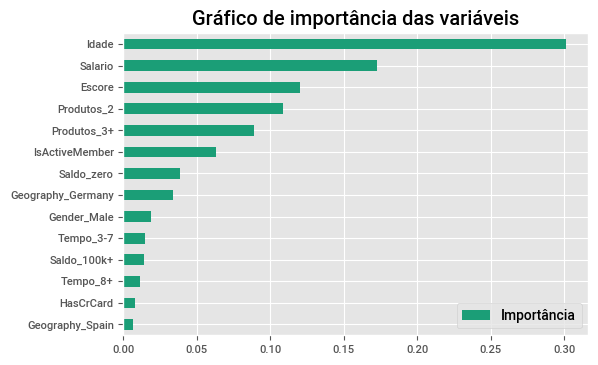

In [ ]:
nomes = list(Xtreino.columns)
x = np.arange(len(nomes))
y = arvore12.feature_importances_
 
plt.style.use('ggplot')
data = pd.DataFrame({'Importância': y}, index = nomes) 
data.sort_values(by = 'Importância').plot(kind = 'barh', colormap = 'Dark2')
plt.title('Gráfico de importância das variáveis')
plt.show()



---



### Enfim, qual estratégia tomar agora?

De acordo com nossos resultados preliminares, temos que o modelo baseado em Árvore de Decisão, com profundidade igual 12, retorna o menor custo na amostra de validação. 

Vamos utilizar o método predict_proba para prever as probabilidades de cada indivíduo na amostra de validação entrar em churn e classificá-los em faixas.

Podemos compor as faixas da seguinte maneira:

- 0% - 25% de probabilidade de Churn: Ações de Marketing Leves
- 25% - 50% de probabilidade de Churn: Ações de Marketing Intermediárias
- 50% - 75% de probabilidade de Churn: Ações de Marketing Fortes
- 75% - 100% de probabilidade de Churn: Ações de Marketing Agressivas

In [ ]:
probs = pd.DataFrame(arvore12.predict_proba(Xvalid))

def aux(x):
    if x < 0.25:
        return 'Leve'
    elif x < 0.5:
        return 'Intermediário'
    elif x < 0.75:
        return 'Forte'
    else:
        return 'Agressivo'

probs['Campanha'] = probs[1].apply(aux)

In [ ]:
probs.head()

In [ ]:
probs['Campanha'].value_counts()

Leve             761
Agressivo        127
Intermediário     90
Forte             22
Name: Campanha, dtype: int64

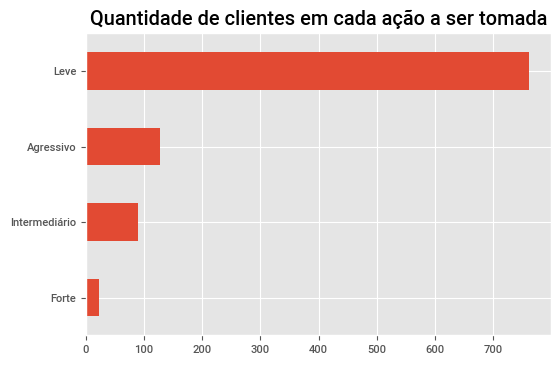

In [ ]:
probs['Campanha'].value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Quantidade de clientes em cada ação a ser tomada')
plt.show()



---



## **Exercício Final**

Faça um projeto com suas ideias e adicione ao seu portfólio!

## **Links Úteis**

- [Conjunto de dados de Churn no kaggle](https://www.kaggle.com/shubh0799/churn-modelling)